In [8]:
import xarray as xr
import dask
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import tqdm
import matplotlib
import datetime
import pickle
import pandas as pd
import itertools
from numba import jit
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.8, 3)))
color1=next(colors)

color3=next(colors)
color2=next(colors)
#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)


In [13]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$\mathrm{O}_2$",
    OmegaA="$\Omega_A$",
    T="T"
    # ALK_norm="Normalized Alkalinity",
    # DIC_norm="Normalized DIC",
    # ALK="Alkalinity",
    # DIC="DIC",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    
    # ALK_norm="mmolk m$^{-3}$",
    # DIC_norm="mmolk m$^{-3}$",
    # ALK="mmolk m$^{-3}$",
    # DIC="mmolk m$^{-3}$"
)
color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

In [3]:
df = pd.read_csv ('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/pdo.timeseries.ersstv5.csv')
Time=df.Date.values
PDO=df.PDO.values
TIME = [datetime.datetime.strptime(t0,'%Y-%m-%d') for t0 in Time[1:]] 
print(TIME[12*142-1], TIME[-36], np.shape(Time), np.shape(PDO))
datesPDO=TIME[12*142-1:-36]
dataPDO=PDO[12*142:-36]

1996-01-01 00:00:00 2020-01-01 00:00:00 (2028,) (2028,)


In [4]:
data=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/npgo.txt') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        count=count+1
        if count>30:
            try:
                #print(l2[0])
                year=int(float(l2[0]))
                #print(year)
                if (year >1995) & (year<2020):
                    #print(year)
                    #count=count+1
                    dat=float(l2[2])
                    #print((dat))

                    data.append(dat)
                    #print(data)
            except Exception as ex:
                print('exception', ex)
dataNPGO =np.array(data)
datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values

exception could not convert string to float: '</pre>'
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception could not convert string to float: '</body></html>'


In [5]:
dataM=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/meiv2.data.txt') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        try:
            #print(l2)
            year=int(l2[0])
            #print(year)
            if (year >1995) & (year<2020):
                #print(year)
                count=count+1
                dat=[float(num) for num in l2[1:]]
                #print(len(dat))
                
                dataM.extend(dat)
        except:
            print('exception', l2)
dataM =np.array(dataM)
datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')
#print(dates)

exception ['-999.00']
exception ['Multivariate', 'ENSO', 'Index', 'Version', '2', '(MEI.v2)']
exception ['https://www.psl.noaa.gov/enso/mei']
exception ['Row', 'values', 'are', '2', 'month', 'seasons', '(YEAR', 'DJ', 'JF', 'FM', 'MA', 'AM', 'MJ', 'JJ', 'JA', 'AS', 'SO', 'ON', 'ND)']


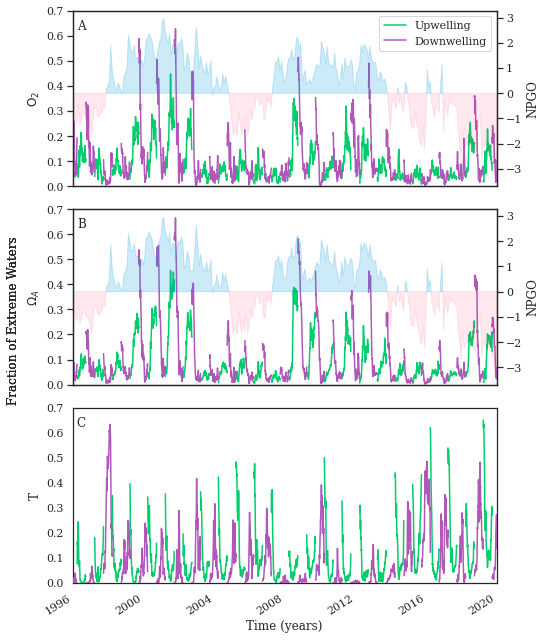

In [32]:
import seaborn as sns
sns.set('notebook')
sns.set_style('white')
at=0.01
bt=0.95
plt.rcParams["font.family"] = "Serif"

subpanel=['A', 'B', 'C']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0=label+'_7_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()

            
    if idx==2:
        pass
    else:
        ax2 = ax.twinx()
        ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(f'{long_names[var]}')

    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,0.7])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    plt.tight_layout()
plt.savefig('../Figures/Canyons_Extremes_NPGO.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

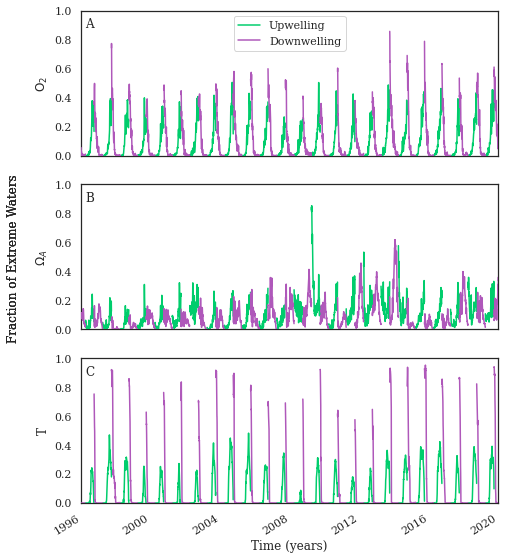

In [33]:
at=0.01
bt=0.95

subpanel=['A', 'B', 'C', 'D', 'E']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0=label+'_5_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()
        
    #ax2 = ax.twinx()
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
    #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    ax.set_ylabel(f'{long_names[var]}')
    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
plt.savefig('../Figures/Shallows_Extremes.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)

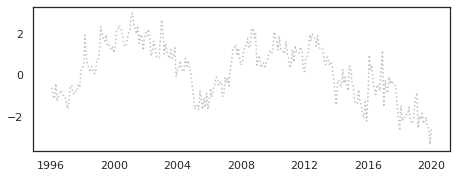

In [16]:
fig = plt.figure(**figprops)

figprops = dict(figsize=(Wf,Hf))
ax = fig.add_subplot(3,1,idx+1)

ax.plot( datesNPGO,dataNPGO, color='0.5', alpha=0.5, linestyle=':')

## Compound Extremes

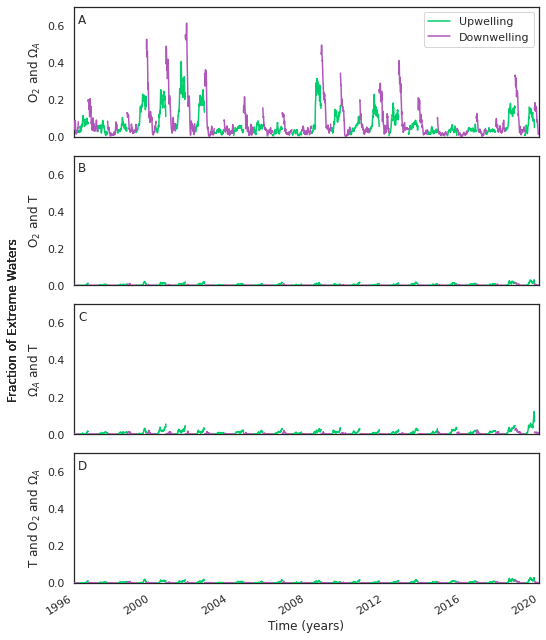

In [34]:
import seaborn as sns
sns.set('notebook')
sns.set_style('white')
at=0.01
bt=0.95

dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T and $\mathrm{O}_2$ and $\Omega_A$']


#long_names0 = list(itertools.combinations(long_names, 2))


subpanel=['A', 'B', 'C', 'D', 'E']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(dual_extreme):
    ax = fig.add_subplot(4,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0=label+'_7_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    ax.set_ylabel( labelnames[idx] )

    if idx==3:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,0.7])
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    plt.tight_layout()
plt.savefig('../Figures/Canyons_Compound_Extremes.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

In [ ]:
print(dual_extreme)

In [18]:
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T, $\mathrm{O}_2$ and $\Omega_A$']
print(labelnames)

['$\\mathrm{O}_2$ and $\\Omega_A$', '$\\mathrm{O}_2$ and T', '$\\Omega_A$ and T', 'T, $\\mathrm{O}_2$ and $\\Omega_A$']


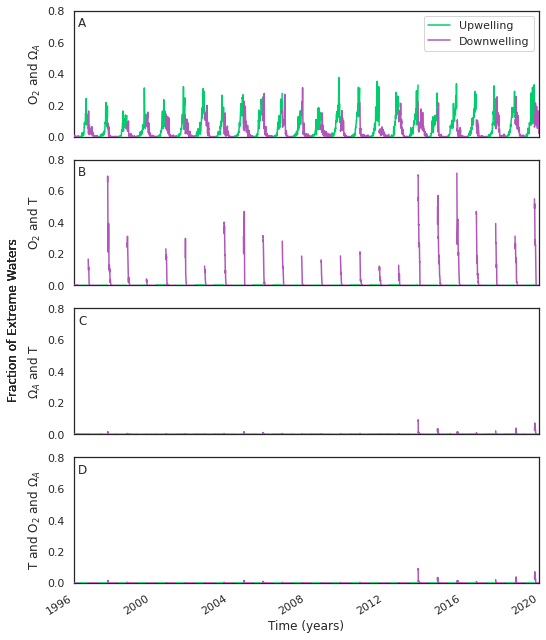

In [35]:
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(dual_extreme):
    ax = fig.add_subplot(4,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0=label+'_5_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(labelnames[idx] )

    if idx==3:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,0.8])
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    plt.tight_layout()
plt.savefig('../Figures/Shallows_Compound_Extremes.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

In [36]:
def pearsonr_ci_dof(x,y,alpha):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''
    #calculatethe effective sample size for dependent sampls using autocorrelation (Storch and zwiers)
    N=len(x)
    r1=acf(x, nlags=1)[-1]
    r2=acf(y, nlags=1)[-1]
    dof = N*(1.-(r1*r2))/(1.+(r1*r2))
    r, p = ss.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(dof-1)
    z = ss.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

def plot_correlations(sig1,sig2,t0,nTime,label):
    alpha=0.1 # %95 confidence interval
    nsig1 = sig1 - np.mean(sig1) # Demean sig1
    nsig2 = sig2 - np.mean(sig2) # Demean
    ccov = np.correlate(nsig1, nsig2, mode='full')
    ccor = ccov / (len(sig2) * np.std(sig1) * np.std(sig2))
    #print(ccor)
    nx=len(sig1)
    lags = np.arange(-nx + 1, nx) # so last value is nx - 1
    ################
    fig=plt.figure(figsize=(6,6))
    ax = fig.add_subplot(311)
    #ax.plot(t0, nsig1, 'b', label='obs')
    print(np.nanmax(sig1), np.nanmax(sig2))
    ax.plot(t0, sig2, color=color1, label=label)
    ax.set_ylabel(label, labelpad=15)

    #ax.set_ylim(-10, 10)
    #ax.legend(loc='upper right', fontsize='small', ncol=2)
    ax = fig.add_subplot(312)
    ax.plot(nTime, sig1, color=color2, label='NEP36')
    ax.set_ylabel('', labelpad=15)
    ax.set_xlabel('Time')
    #ax.plot(t0, nsig2, 'r', label='PDO')
    #ax.set_ylim(-10, 10)
    #ax.legend(loc='upper right', fontsize='small', ncol=2)
    ax = fig.add_subplot(313)
    ax.plot(lags, ccor)
    ax.plot(lags[len(sig1)-1], ccor[len(sig1)-1], 'ro')
    ax.annotate( 'corr= '+str(round(ccor[len(sig1)-1],2)), (lags[len(sig1)-1], 0))
    #ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel('cross-correlation')
    ax.set_xlabel('lag relative to ' + label)

    maxlag = lags[np.argmax(ccor)]
    minlag = lags[np.argmin(ccor)]
    print("max correlation is at lag %d" % maxlag)
    print("min correlation is at lag %d" % minlag)
    plt.tight_layout()
    r, p, lo, hi=pearsonr_ci_dof(nsig1,nsig2,alpha)
    print('The pearson R value is ',  r, ' and the p_value is ', p)
    #print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent based on pearson')
    else:
        print('Probably dependent based on pearson')
            
    print('With', 100*(1-alpha), '% confidence, the time series correlation is between ', lo, hi)

In [ ]:
t0 = 1996
dt = 1/12  # In years
N = len(data)
ts = np.arange(0, N) * dt + t0

In [ ]:
ts=
plot_correlations(I_51,s1, ts, ts, 'Heat Content')

In [ ]:
dfg['x'].values